In [4]:
import pandas as pd
import os

# Step 1: Read list of file paths from a text file

file_paths_txt = '/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/derivatives/csv_paths.txt'

# Read the text file containing paths to CSV files
file_paths = []
with open(file_paths_txt, "r") as file:
    file_paths = file.readlines()
file_paths = [path.strip() for path in file_paths]  # Remove leading/trailing whitespaces

# Initialize a dictionary to store connections count for each subject
connections_dict = {}

# Process each CSV file
for file_path in file_paths:
    # Extract subject ID from the file name
    sub_id = os.path.basename(file_path).split('_')[0]
    
    # Load the CSV file without header
    df = pd.read_csv(file_path, index_col=None, header=None)  # No header specified
    
    # Count the number of connections (non-zero entries) for each node
    connections_count = df.astype(bool).sum()  # Count non-zero entries for each column/node
    
    # Update the connections dictionary for this subject
    connections_dict[sub_id] = connections_count.values  # Store the values array instead of Series

# Create a DataFrame from the connections count dictionary
connections_df = pd.DataFrame.from_dict(connections_dict, orient='index')

# Transpose the DataFrame
connections_df_transposed = connections_df.T
connections_df_transposed.sort_index(axis=1, inplace=True)
connections_df_transposed.index = range(1, len(connections_df_transposed) + 1)

# Save the DataFrame to a TSV file
output_tsv_file = "/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/derivatives/output_num_connections.tsv"
connections_df_transposed.to_csv(output_tsv_file, sep='\t', index_label='nodes')

In [3]:
import pandas as pd
import os

# Path to the text file containing paths to CSV files for each subject
file_paths_txt = '/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/derivatives/csv_paths.txt'

# Read the text file containing paths to CSV files
file_paths = []
with open(file_paths_txt, "r") as file:
    file_paths = file.readlines()
file_paths = [path.strip() for path in file_paths]  # Remove leading/trailing whitespaces

# Initialize a dictionary to store sums for each subject
sums_dict = {}

# Process each CSV file
for file_path in file_paths:
    # Extract subject ID from the file name
    sub_id = os.path.basename(file_path).split('_')[0]
    
    # Load the CSV file without header and without specifying index column
    df = pd.read_csv(file_path, header=None)  # No header specified
    
    # Sum the entries along the rows and round to the second decimal place
    row_sums = df.sum(axis=1).round(3)
    
    # Update the sums dictionary for this subject
    sums_dict[sub_id] = row_sums.values  # Store the values array instead of Series

# Create a DataFrame from the sums dictionary
sums_df = pd.DataFrame.from_dict(sums_dict, orient='index')

# Transpose the DataFrame
sums_df_transposed = sums_df.T
sums_df_transposed.sort_index(axis=1, inplace=True)

# Reset the index starting from 1 for the nodes
sums_df_transposed.index = range(1, len(sums_df_transposed) + 1)

output_tsv_file = "/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/derivatives/output_strength_connections.tsv"
sums_df_transposed.to_csv(output_tsv_file, sep='\t', index_label='nodes')

In [ ]:
## Plotting of num connections

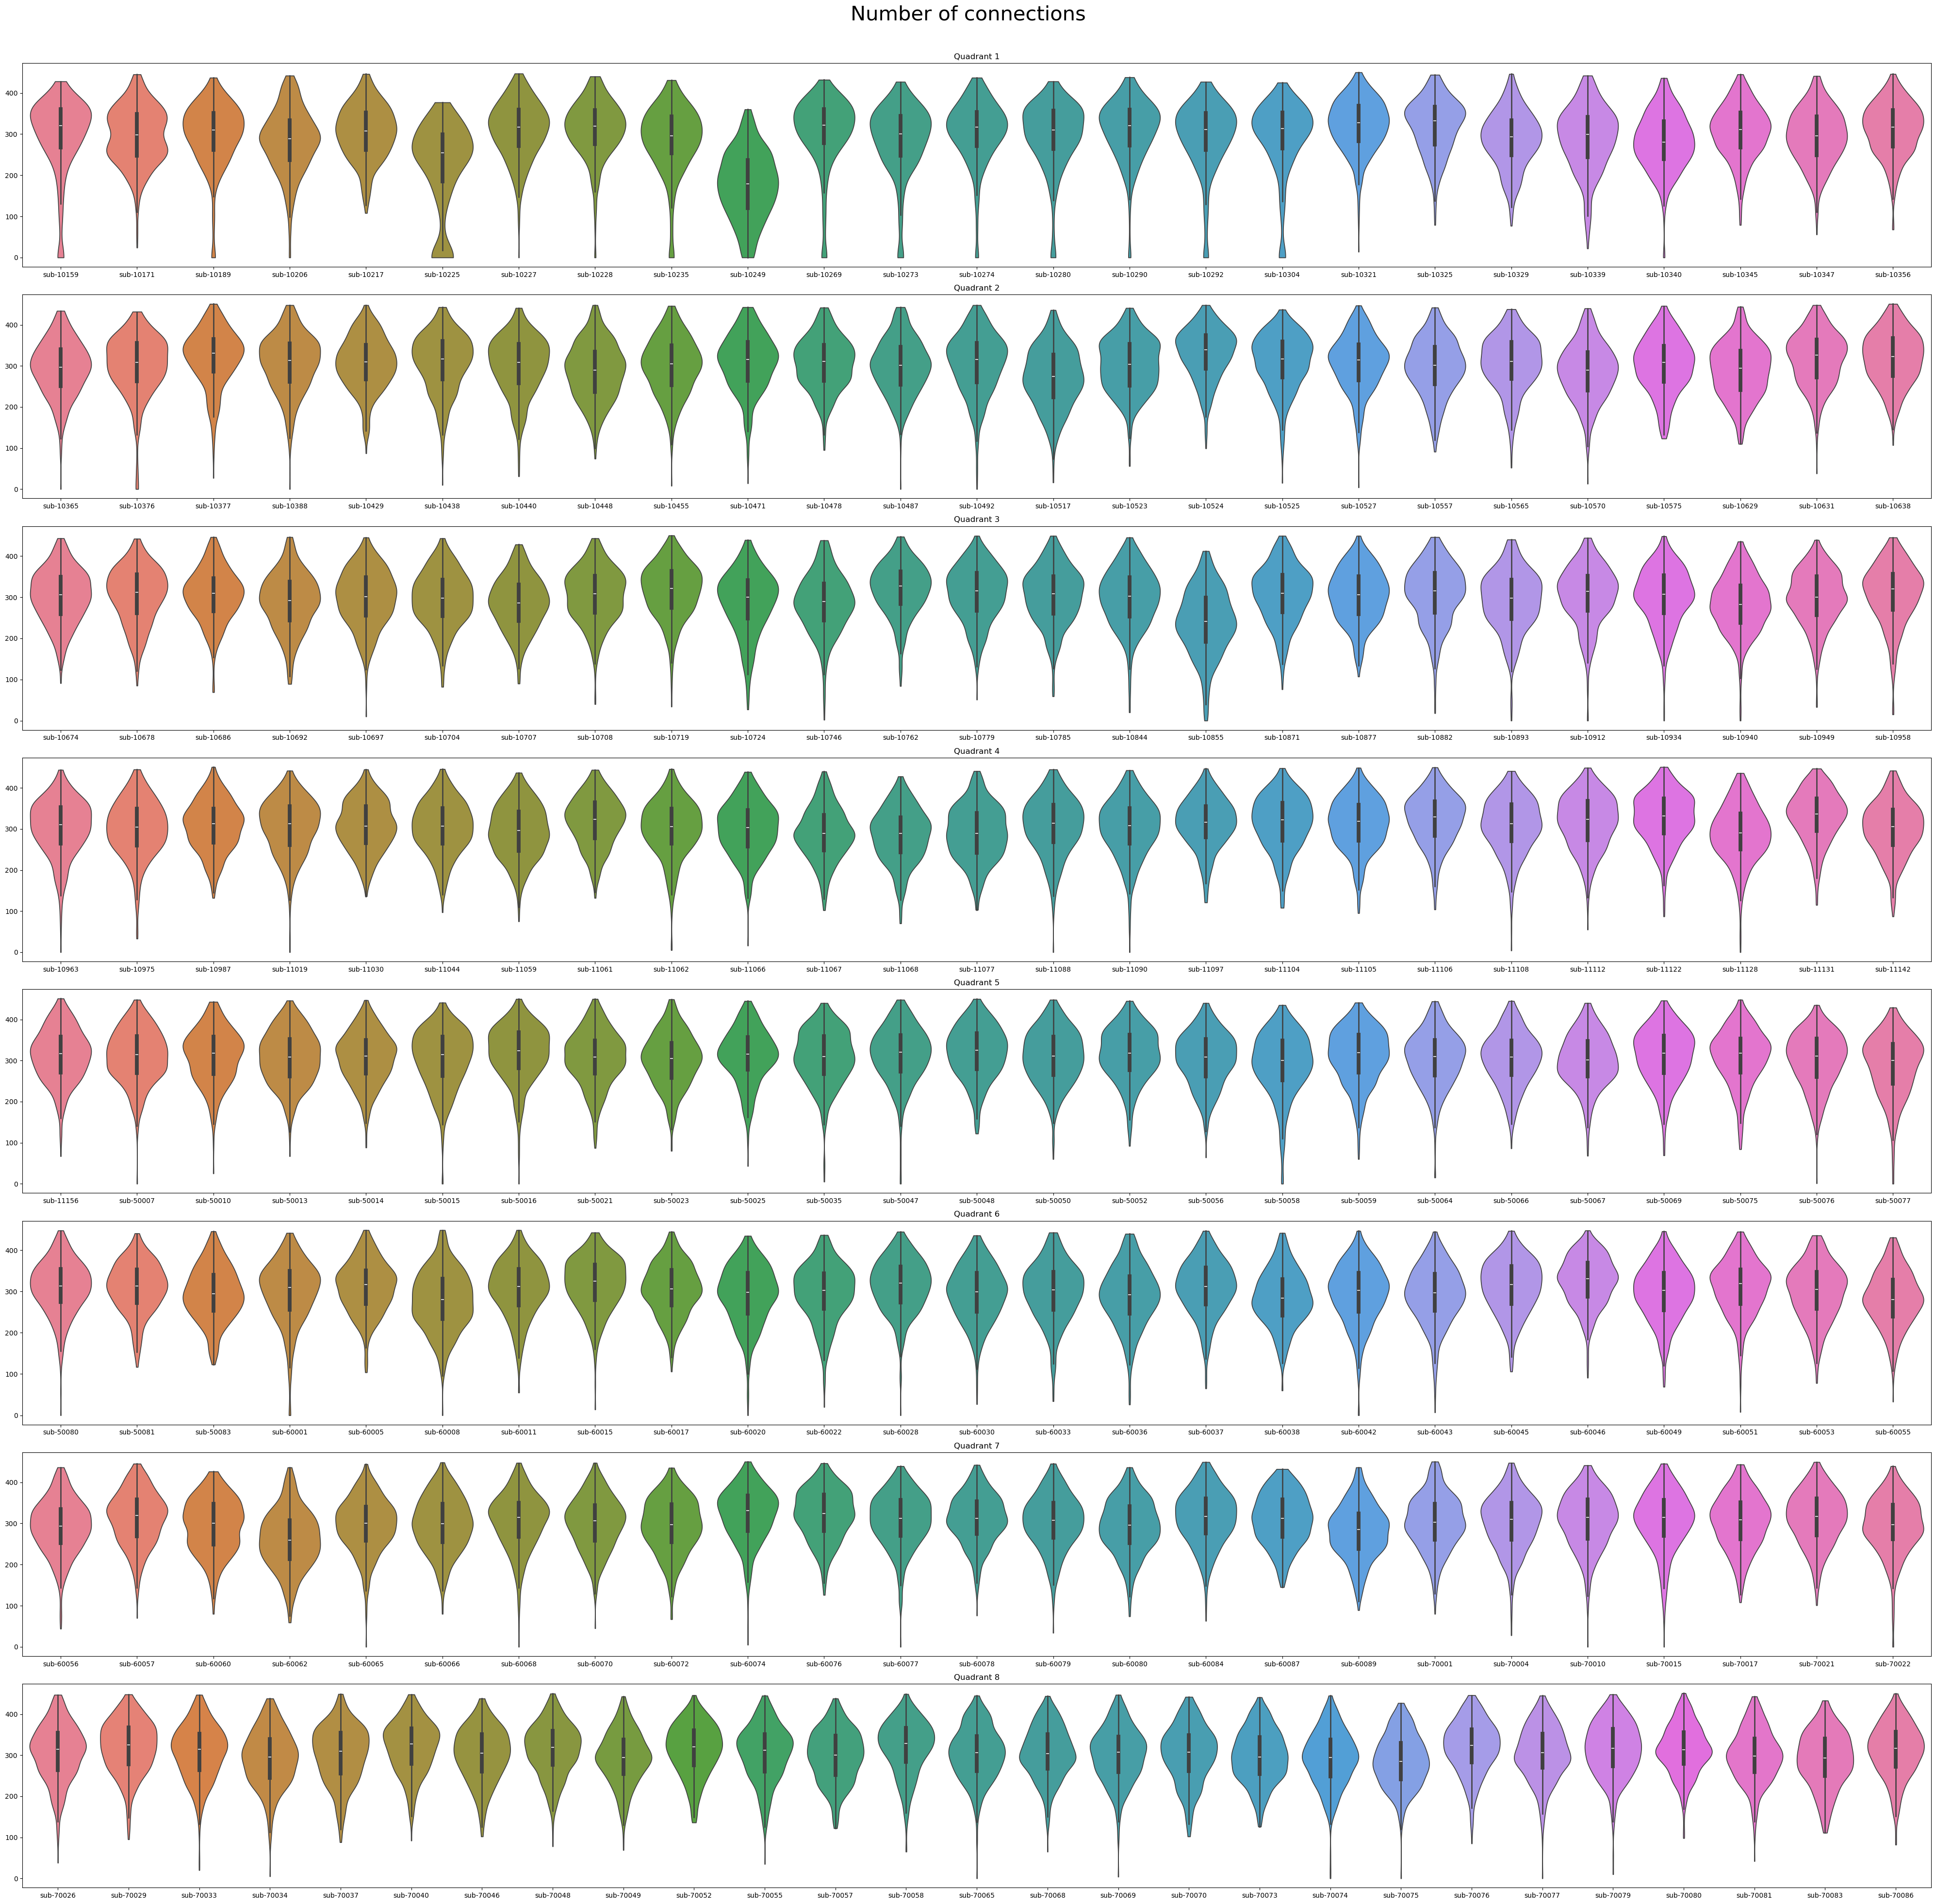

In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
vols = pd.read_csv("/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/derivatives/output_num_connections.tsv", sep='\t')
vols = vols.set_index('nodes')
vols = vols.reindex(sorted(vols.columns), axis=1)

# Determine the number of subjects and calculate the number of subplots needed
num_subjects = len(vols.columns)
num_subplots = 8
subplots_per_quadrant = num_subjects // num_subplots

# Calculate the number of subjects in the last quadrant
subjects_remaining = num_subjects % num_subplots

# Create subplots for each quadrant
fig, axs = plt.subplots(num_subplots, 1, figsize=(40, 40))

# Plot each quadrant
for i in range(num_subplots - 1):
    start_index = i * subplots_per_quadrant
    end_index = (i + 1) * subplots_per_quadrant
    subset_vols = vols.iloc[:, start_index:end_index]
    ax = sns.violinplot(data=subset_vols, ax=axs[i], cut=0)  # Set cut=0 to align with y=0
    ax.set_title(f'Quadrant {i+1}')

# Plot the remaining subjects in the last subplot
start_index = (num_subplots - 1) * subplots_per_quadrant
subset_vols = vols.iloc[:, start_index:num_subjects]
ax = sns.violinplot(data=subset_vols, ax=axs[num_subplots - 1], cut=0)  # Set cut=0 to align with y=0
ax.set_title(f'Quadrant {num_subplots}')

fig.suptitle("Number of connections", size=30)

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()


In [ ]:
## Plotting of strength of connections

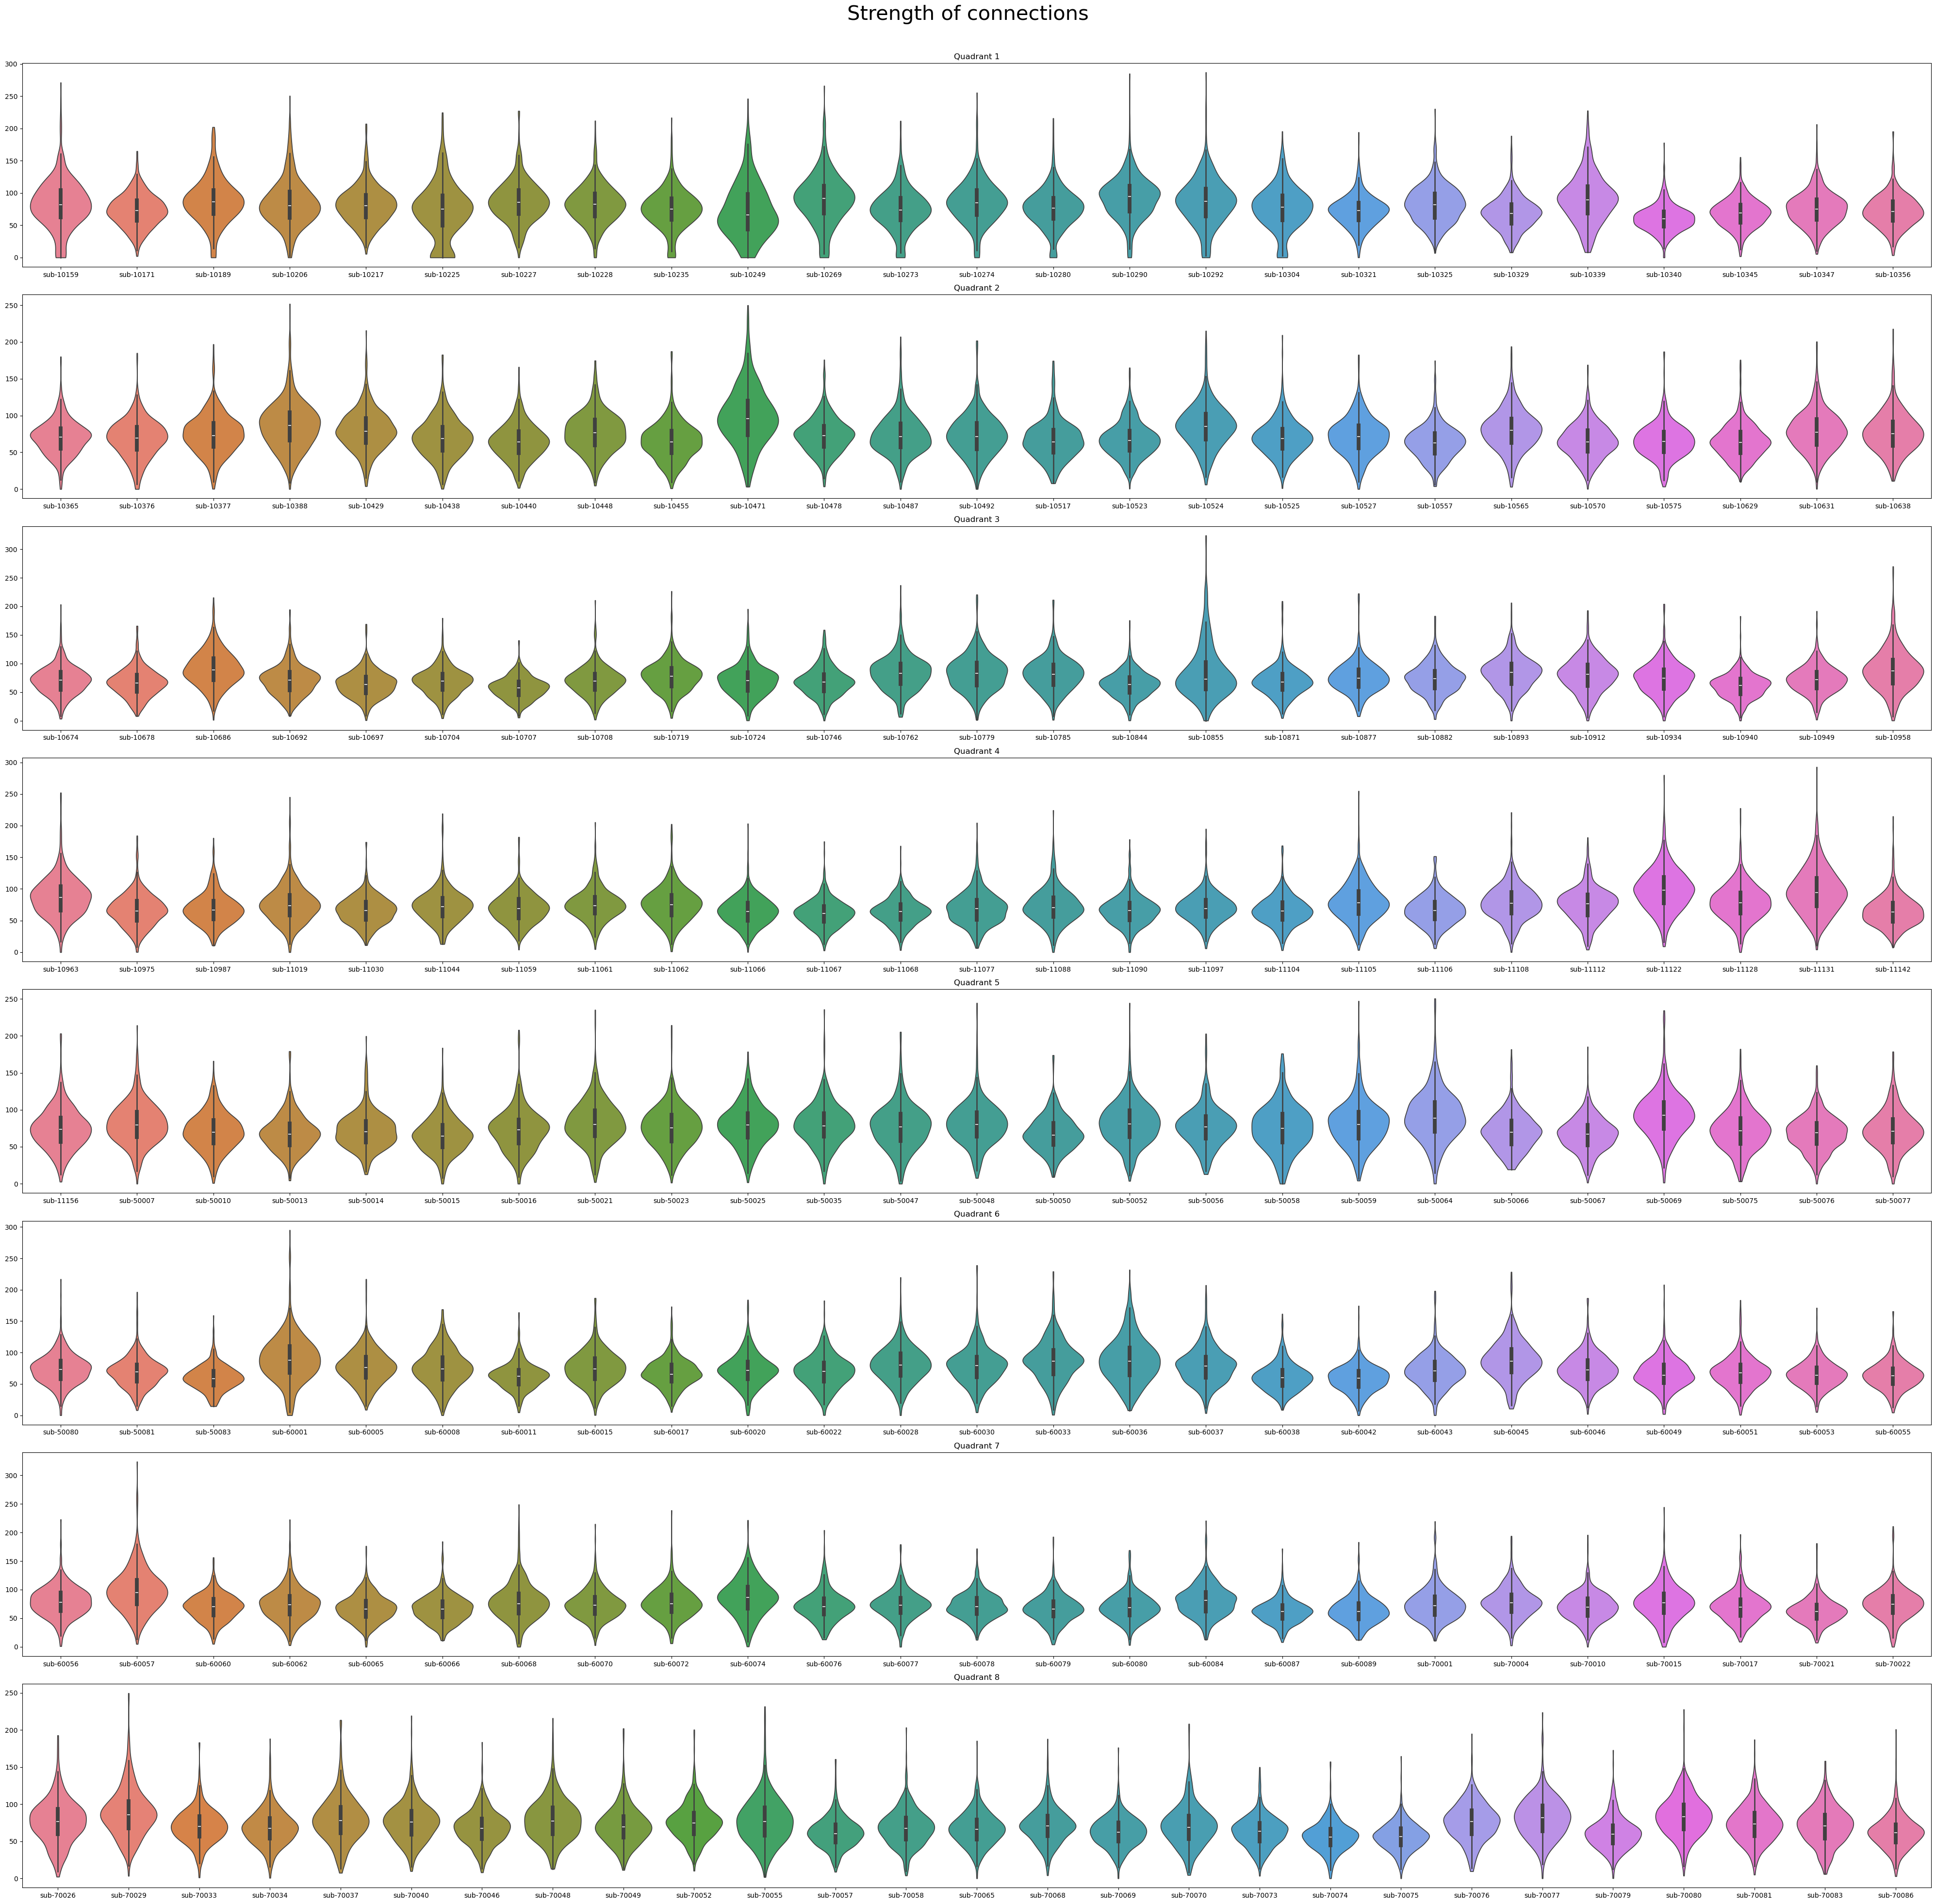

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
vols = pd.read_csv("/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/derivatives/output_strength_connections.tsv", sep='\t')
vols = vols.set_index('nodes')
vols = vols.reindex(sorted(vols.columns), axis=1)

# Determine the number of subjects and calculate the number of subplots needed
num_subjects = len(vols.columns)
num_subplots = 8
subplots_per_quadrant = num_subjects // num_subplots

# Calculate the number of subjects in the last quadrant
subjects_remaining = num_subjects % num_subplots

# Create subplots for each quadrant
fig, axs = plt.subplots(num_subplots, 1, figsize=(40, 40))

# Plot each quadrant
for i in range(num_subplots - 1):
    start_index = i * subplots_per_quadrant
    end_index = (i + 1) * subplots_per_quadrant
    subset_vols = vols.iloc[:, start_index:end_index]
    ax = sns.violinplot(data=subset_vols, ax=axs[i], cut=0)  # Set cut=0 to align with y=0
    ax.set_title(f'Quadrant {i+1}')

# Plot the remaining subjects in the last subplot
start_index = (num_subplots - 1) * subplots_per_quadrant
subset_vols = vols.iloc[:, start_index:num_subjects]
ax = sns.violinplot(data=subset_vols, ax=axs[num_subplots - 1], cut=0)  # Set cut=0 to align with y=0
ax.set_title(f'Quadrant {num_subplots}')
fig.suptitle("Strength of connections", size=30)

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

In [ ]:
# plot parcels

nodes       1.0     2.0     3.0      4.0      5.0      6.0     7.0     8.0    \
nodes       1.000   2.000   3.000    4.000    5.000    6.000   7.000   8.000   
sub-10159  39.444  41.107  68.194   83.346  121.779  129.116  88.556  62.254   
sub-10171  27.365  32.296  51.827   91.339  116.728   91.564  77.162  31.501   
sub-10189  23.580  37.319  45.516   60.766   88.870  120.720  90.511  55.229   
sub-10206  55.855  85.584  62.131  105.538  112.502  139.847  89.843  68.024   
...           ...     ...     ...      ...      ...      ...     ...     ...   
sub-70079  26.999  36.766  49.025   53.641   87.882  101.797  68.940  45.868   
sub-70080  17.425  31.679  65.831   73.021   92.313   99.381  98.144  44.444   
sub-70081  17.945  45.996  51.766   66.364   85.998  125.509  90.020  43.142   
sub-70083  26.666  17.741  67.875   61.214   78.312   85.676  88.079  39.016   
sub-70086  20.122  36.451  47.224   59.451   74.044  105.346  69.276  39.163   

nodes       9.0     10.0   ...    445.0

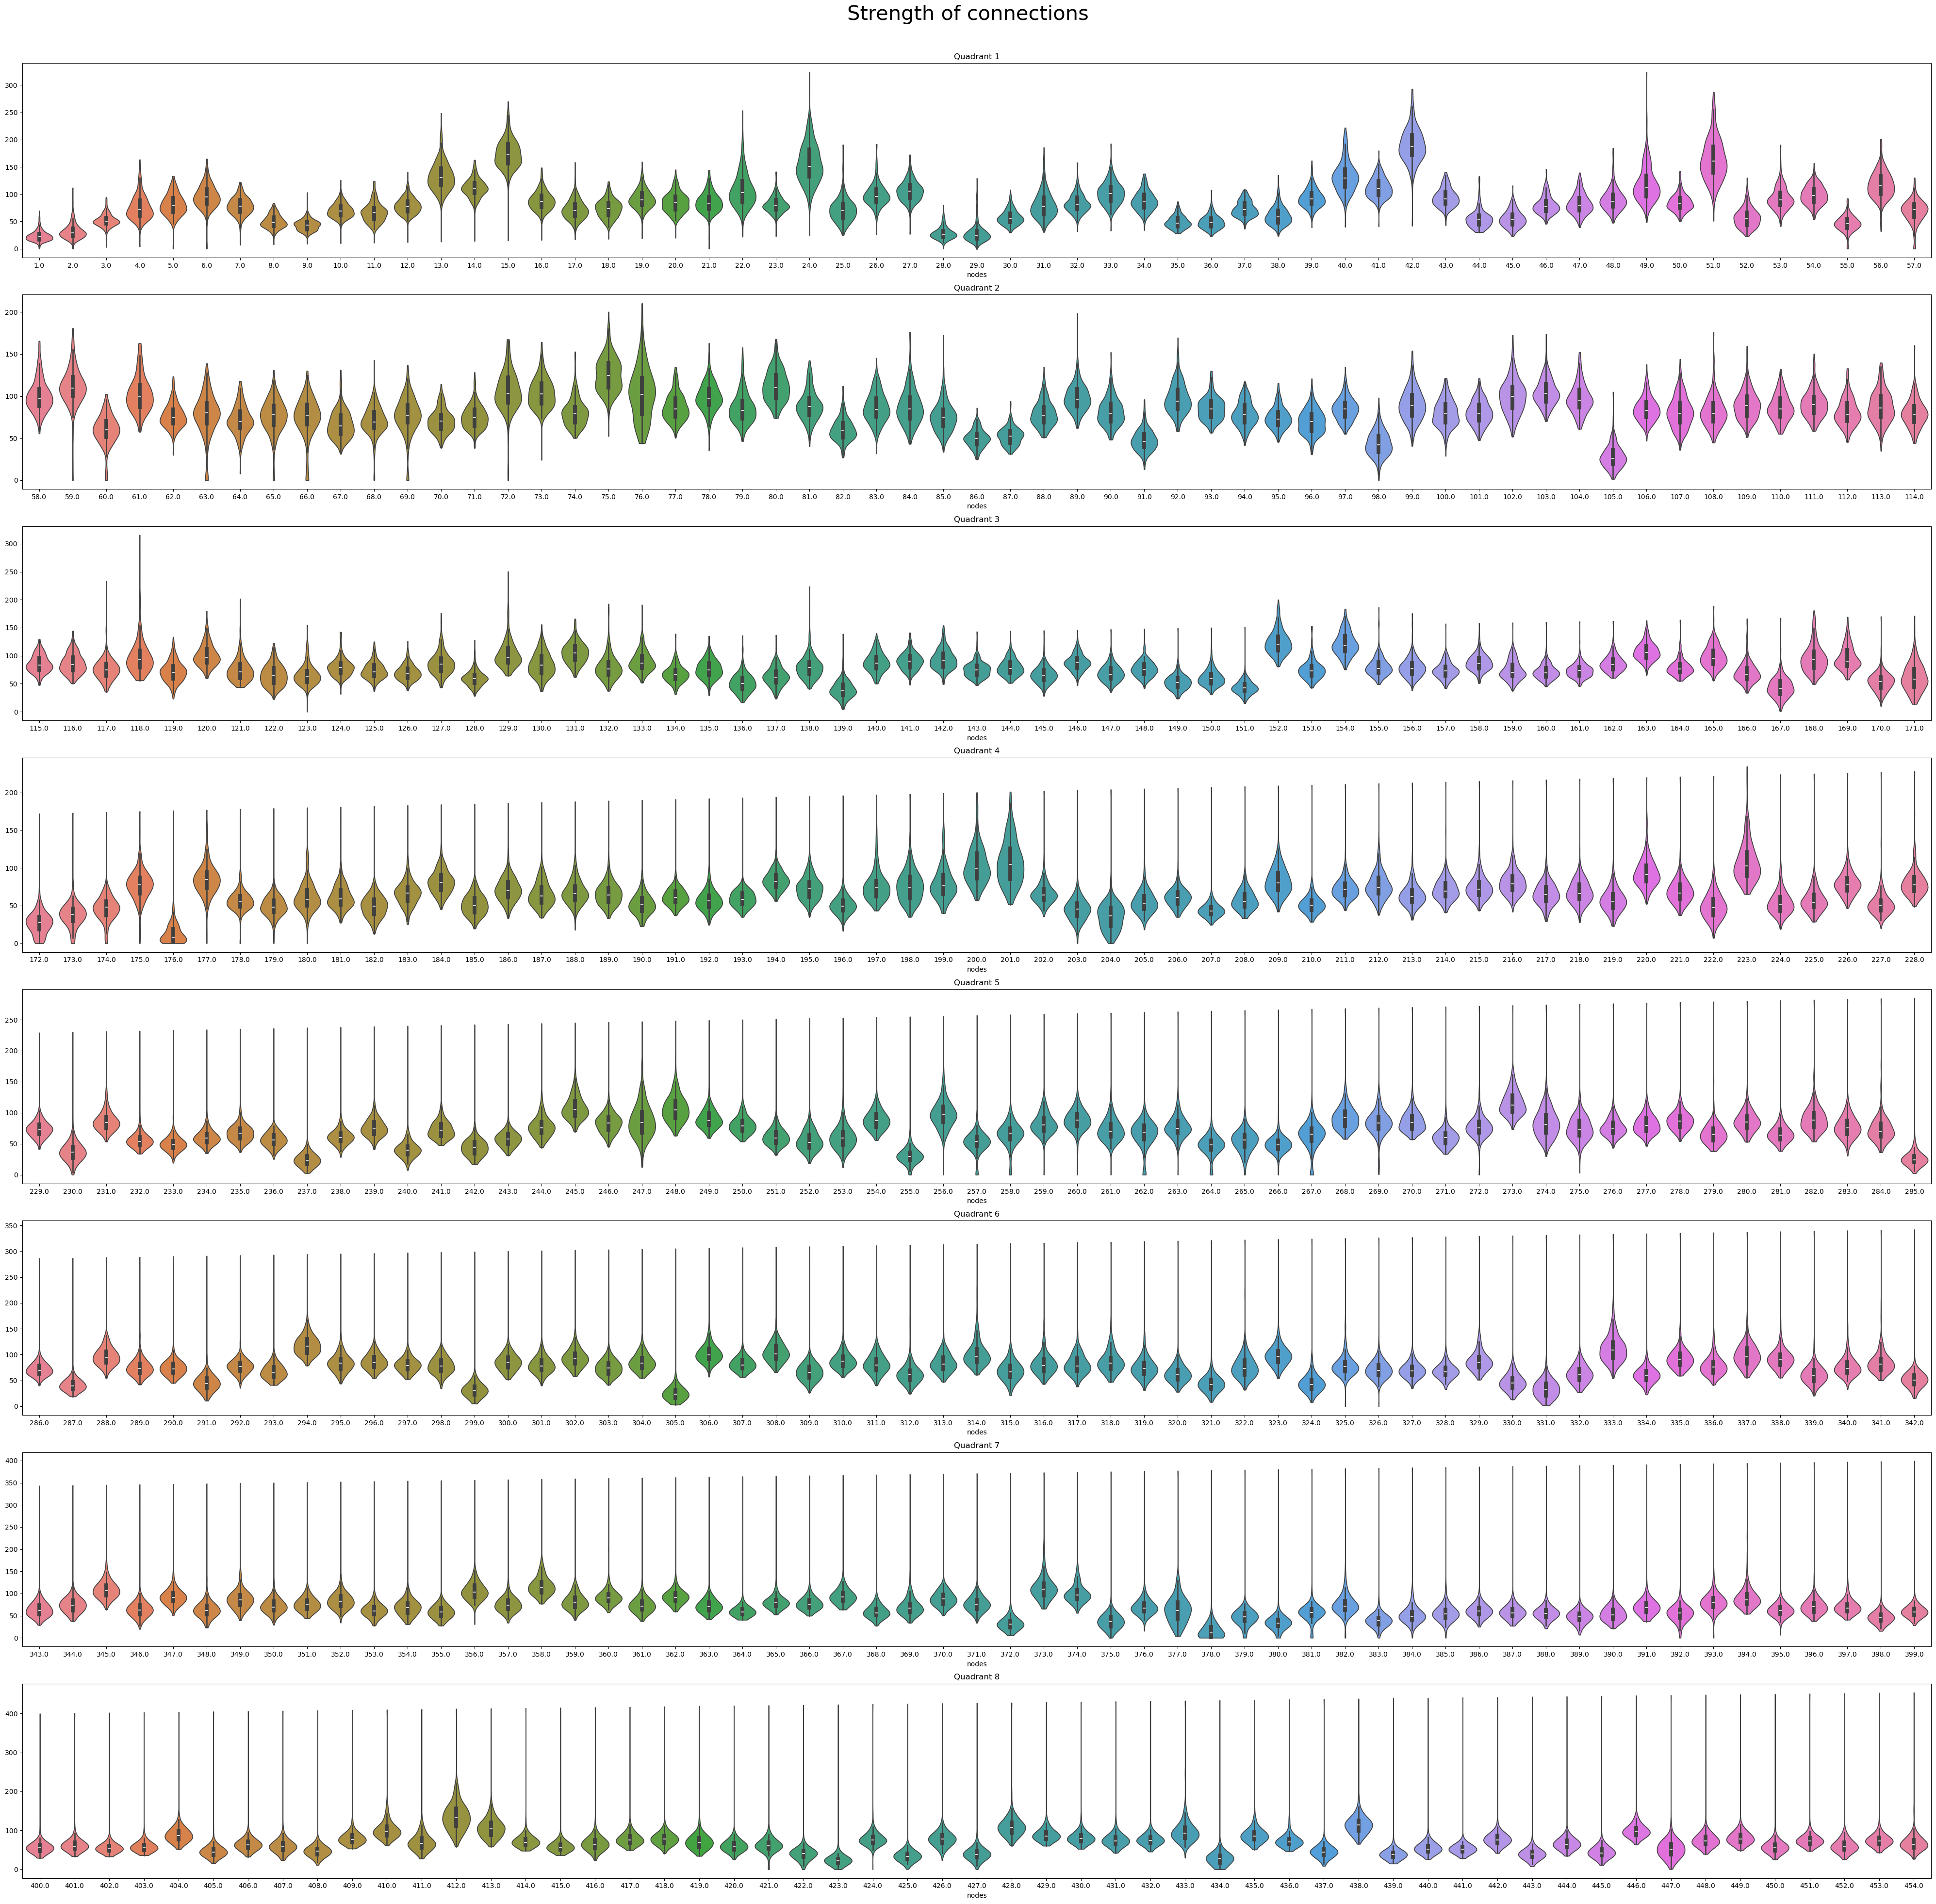

In [40]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
vols = pd.read_csv("/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/derivatives/output_strength_connections.tsv", sep='\t', skiprows=0)
vols = vols.T
vols.columns = vols.iloc[0]
#vols = vols.set_index([0])
#vols = vols.reindex(sorted(vols.columns), axis=1)
print(vols)
# Determine the number of subjects and calculate the number of subplots needed
num_parcels = len(vols.columns)
print(num_parcels)
num_subplots = 8
subplots_per_quadrant = num_parcels // num_subplots
print(subplots_per_quadrant)
# Calculate the number of subjects in the last quadrant
parcels_remaining = num_parcels % num_subplots
print(parcels_remaining)
# Create subplots for each quadrant
fig, axs = plt.subplots(num_subplots, 1, figsize=(40, 40))

# Plot each quadrant
for i in range(num_subplots - 1):
    start_index = i * (subplots_per_quadrant + 1)
    end_index = (i + 1) * (subplots_per_quadrant + 1)
    subset_vols = vols.iloc[:, start_index:end_index]
    ax = sns.violinplot(data=subset_vols, ax=axs[i], cut=0)  # Set cut=0 to align with y=0
    ax.set_title(f'Quadrant {i+1}')

# Plot the remaining subjects in the last subplot
start_index = (num_subplots - 1) * (subplots_per_quadrant + 1)
subset_vols = vols.iloc[:, start_index:num_parcels]
ax = sns.violinplot(data=subset_vols, ax=axs[num_subplots - 1], cut=0)  # Set cut=0 to align with y=0
ax.set_title(f'Quadrant {num_subplots}')
fig.suptitle("Strength of connections", size=30)

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

In [ ]:
#plot parcels - num connections